#**Analyzing Signup Rates for Mailer Types for ABC Grocery Store**

In [1]:
import pandas as pd
import scipy as sp
from scipy.stats import chi2_contingency, chi
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## import the mailer data
mailer_df = pd.read_excel('/content/grocery_database.xlsx', sheet_name = 'campaign_data' )

In [3]:
mailer_df.head()

,customer_id,campaign_name,campaign_date,mailer_type,signup_flag
0,74,delivery_club,2020-07-01,Mailer1,1
1,524,delivery_club,2020-07-01,Mailer1,1
2,607,delivery_club,2020-07-01,Mailer2,1
3,343,delivery_club,2020-07-01,Mailer1,0
4,322,delivery_club,2020-07-01,Mailer2,1


In [4]:
## excluding the control group for the analysis
campaign_data = mailer_df.loc[mailer_df['mailer_type'] != 'Control']


##**Analyzing Mailer Type Effectiveness**



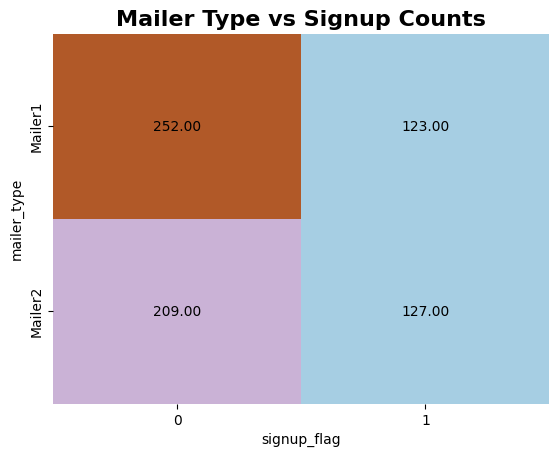

In [10]:
sns.heatmap(pd.crosstab(campaign_data['mailer_type'], campaign_data['signup_flag']),  annot=True, fmt=".2f", annot_kws={"size": 10, "color": "black"}, cmap="Paired",cbar= False)
plt.title("Mailer Type vs Signup Counts", fontsize=16, fontweight='bold')
plt.show()

### At the outset there seems to be a  difference in signup rates amongst the two mailers
  ### - For **mailer 1** the signup rate is 123/375 = **0.328**
  ### - For **mailer 2** the signup rate is 127/336 = **0.378**

## Checking for statistical difference with Chi_sq test

In [11]:
null_hypothesis = "There is no relationship between mailer type and signup rate. They are independent"
alternate_hypothesis = "There is a relationship between mailer type and signup rate. They are not independent"
acceptance_criteria = 0.05

chi2_statistic, p_value, dof, expected_values = chi2_contingency(pd.crosstab(campaign_data['mailer_type'], campaign_data['signup_flag']),correction = False)

print("Chi-squared Statistic:", chi2_statistic)
print("P-value:", p_value)


Chi-squared Statistic: 1.9414468614812481
P-value: 0.16351152223398197


In [12]:
print(f"""Since p value of {p_value} is more than the threshold value of confidence level of {acceptance_criteria},
we cannot reject the hypothesis that:
{null_hypothesis}""")

Since p value of 0.16351152223398197 is more than the threshold value of confidence level of 0.05,
we cannot reject the hypothesis that:
There is no relationship between mailer type and signup rate. They are independent


#**Conclusion**

## We cannot statistically say that the signup rate for mailer_2 is higher than mailer_1